In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [483]:
fishData = pd.read_csv("Fish.csv")

In [484]:
fishData.head(100)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
95,Perch,170.0,21.5,23.5,25.0,6.2750,3.7250
96,Perch,225.0,22.0,24.0,25.5,7.2930,3.7230
97,Perch,145.0,22.0,24.0,25.5,6.3750,3.8250
98,Perch,188.0,22.6,24.6,26.2,6.7334,4.1658


In [485]:
fishData.shape

(159, 7)

In [486]:
fishData.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [487]:
fishData.count()

Species    159
Weight     159
Length1    159
Length2    159
Length3    159
Height     159
Width      159
dtype: int64

In [488]:
fishData.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [489]:
fishData.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

# Task 1 #

### 1. Split the dataset randomly into training (70%) and testing (30%) sets. ###

In [490]:
X = fishData.drop(['Weight'],axis=1).drop(['Species'],axis=1)

y = fishData['Weight']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=2)

print("Test Data = ",x_test.shape)
print("Train Data = ",x_train.shape)
print("Target Train = ",y_train.shape)
print("Target Test = ",y_test.shape)

Test Data =  (48, 5)
Train Data =  (111, 5)
Target Train =  (111,)
Target Test =  (48,)


### 2. Apply the following models: Linear Regression, Random Forest. ###

#### Linear Regression ####

In [491]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [492]:
lr_pred = LR.predict(x_test)
print('LineRegression r2_score :', r2_score(y_test, lr_pred))

LineRegression r2_score : 0.7953448938040526


#### Random Forest ####

In [493]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [494]:
forest_pred = forest.predict(x_test)
print('Random Forest:', r2_score(y_test, forest_pred))

Random Forest: 0.9477260548012536


### 3. Calculate RMSE (Root Mean Squared Error) and R2 (Coefficient of Determination) on the test set. ###

#### Linear Regression ####

In [495]:
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print(f"Root Mean Squared Error (RMSE): {lr_rmse}")
print(f"R-squared (R²): {lr_r2}")

Root Mean Squared Error (RMSE): 147.6985504171704
R-squared (R²): 0.7953448938040526


#### Random Forest ####

In [496]:
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_pred))
forest_r2 = r2_score(y_test, forest_pred)

print(f"Root Mean Squared Error (RMSE): {forest_rmse}")
print(f"R-squared (R²): {forest_r2}")

Root Mean Squared Error (RMSE): 74.64617861297947
R-squared (R²): 0.9477260548012536


### 4. Linear Regression: Visualize the predictions by plotting y_pred vs y_real and compare the performance of the models. ###

#### Linear Regression ####

Text(0.5, 1.0, 'Linear Regression Predictions Scatter Plot')

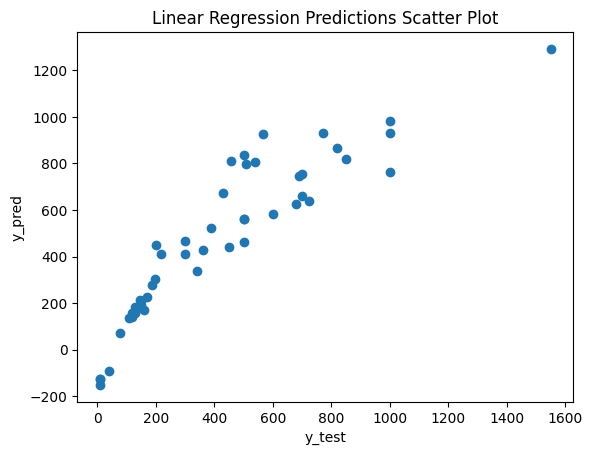

In [497]:
plt.scatter(y_test, lr_pred)

# Add labels and title
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Linear Regression Predictions Scatter Plot')

#### Random Forest ####

Text(0.5, 1.0, 'Random Forest Predictions Scatter Plot')

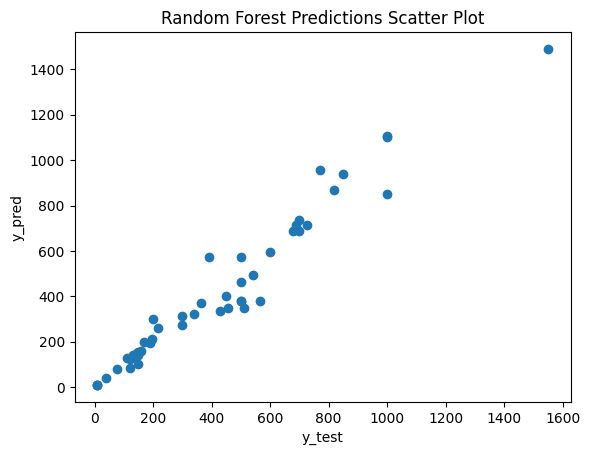

In [498]:
plt.scatter(y_test, forest_pred)

# Add labels and title
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Random Forest Predictions Scatter Plot')

### 5. Provide your opinion on which metric, RMSE or R2, is more appropriate in this case. ###

#### --> The random forest model delivers much better results than the linear regression model. The RMSE is much lower for the random forest model what indicates that the predictions are much closer to the real values. The R2 is much closer to 1, what means that the model applys well. ####

# Task 2 #

### 1. Change the training-test split to ensure that each species has 70% of its samples in the training set and 30% in the test set. ###

In [499]:
x = fishData.drop(['Weight'],axis=1).drop(['Species'],axis=1)
y = fishData['Weight']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=fishData['Species'], random_state=42)

print(f"Training set size: {x_train.shape[0]} samples")
print(f"Testing set size: {x_test.shape[0]} samples")

Training set size: 111 samples
Testing set size: 48 samples


### 2. Apply the following models: Linear Regression, Random Forest. ###

#### Linear Regression ####

In [500]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [501]:
lr_pred = LR.predict(x_test)
print('LineRegression r2_score :', r2_score(y_test, lr_pred))

LineRegression r2_score : 0.8792826665792333


#### Random Forest ####

In [502]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [503]:
forest_pred = forest.predict(x_test)
print('Random Forest:', r2_score(y_test, forest_pred))

Random Forest: 0.9659374206085398


### 3. Calculate RMSE (Root Mean Squared Error) and R2 (Coefficient of Determination) on the test set. ###

#### Linear Regression ####

In [504]:
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print(f"Root Mean Squared Error (RMSE): {lr_rmse}")
print(f"R-squared (R²): {lr_r2}")

Root Mean Squared Error (RMSE): 138.6014520458015
R-squared (R²): 0.8792826665792333


#### Random Forest ####

In [505]:
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_pred))
forest_r2 = r2_score(y_test, forest_pred)

print(f"Root Mean Squared Error (RMSE): {forest_rmse}")
print(f"R-squared (R²): {forest_r2}")

Root Mean Squared Error (RMSE): 73.6243933480949
R-squared (R²): 0.9659374206085398


### 4. Linear Regression: Visualize the predictions by plotting y_pred vs y_real and compare the performance of the models. ###

#### Linear Regression ####

Text(0.5, 1.0, 'Linear Regression Predictions Scatter Plot')

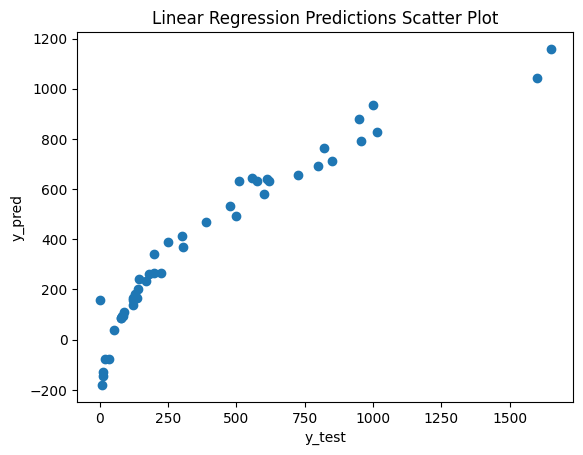

In [506]:
plt.scatter(y_test, lr_pred)

# Add labels and title
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Linear Regression Predictions Scatter Plot')

#### Random Forest ####

Text(0.5, 1.0, 'Random Forest Predictions Scatter Plot')

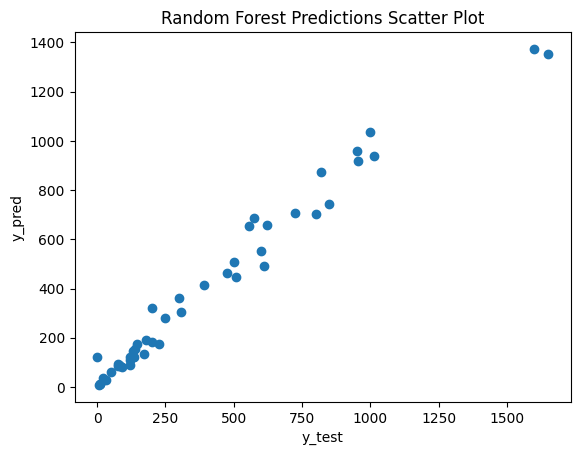

In [507]:
plt.scatter(y_test, forest_pred)

# Add labels and title
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Random Forest Predictions Scatter Plot')

# Comparison #

### Compare the results obtained from Task 1 and Task 2. ###

#### --> The species distribution has an overall positive impact on the models performances. For linear regression, the species distribution leads to an improvement in prediction accuracy (lower RMSE) and an improvement in the variance explaination (higher r2), while for random forest, the variance is better explained (higher r2), even though prediction accuracy is slightly compromised (higher RMSE). This indicates that the species distribution can be very benefitial for enhancing a models performance. Generally, random forest also has better results than linar regression. ####

# Extra Point #

### Point out which parameters can be adjusted in this exercise to improve model performance. (dont need to run analysis again)  ###

#### --> One idea is to identify and remove striking outliers in the data preprocessing stage (data clean). Also, ML algorithms that rely on gradient descent like linear regression, perform better when features are on similar scale. Because of that, feature scaling by using for example "StandardScaler", can improve the models performance. ####